In [1]:
# ✅ STEP 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# ✅ STEP 2: Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')  # Change if your path is different
print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# ✅ STEP 3: Data Preprocessing
# Drop 'CustomerID' as it's just an identifier, and encode or drop 'Gender' (optional)
df_clean = df.drop(['CustomerID'], axis=1)

# Encode Gender (optional): Convert categorical to numeric
df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})
df_clean.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


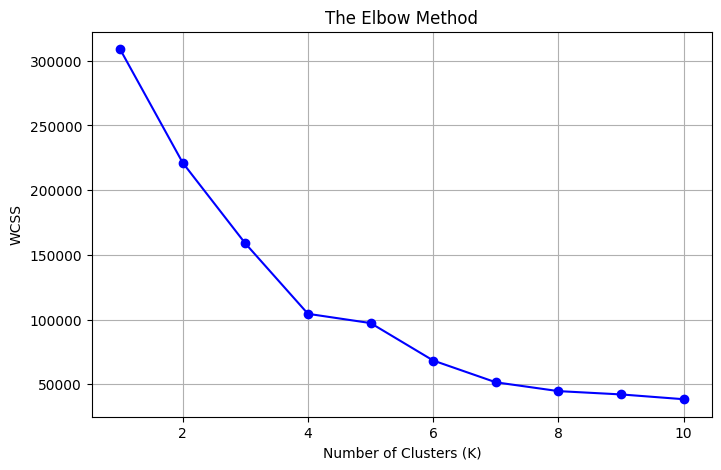

In [3]:
# ✅ STEP 4: Use the Elbow Method to find the optimal K
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_clean)
    wcss.append(kmeans.inertia_)

# Plot the elbow curves
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [4]:
# ✅ STEP 5: Fit KMeans with optimal K (choose from Elbow, say K=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(df_clean)

print("KMeans clustering completed with K =", optimal_k)
df_clean.head()


KMeans clustering completed with K = 5


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,0
3,1,23,16,77,2
4,1,31,17,40,0


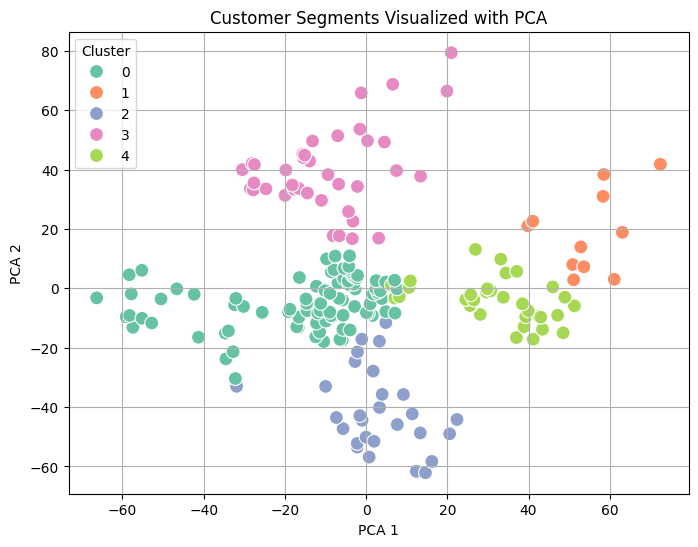

In [5]:
# ✅ STEP 6: Visualize Clusters using PCA (2D Projection)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_clean.drop('Cluster', axis=1))
df_clean['PCA1'] = pca_features[:, 0]
df_clean['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_clean, palette='Set2', s=100)
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [6]:
# ✅ STEP 7: Evaluate Clustering using Silhouette Score
score = silhouette_score(df_clean.drop(['Cluster', 'PCA1', 'PCA2'], axis=1), df_clean['Cluster'])
print(f"Silhouette Score for K = {optimal_k}: {score:.3f}")


Silhouette Score for K = 5: 0.357
